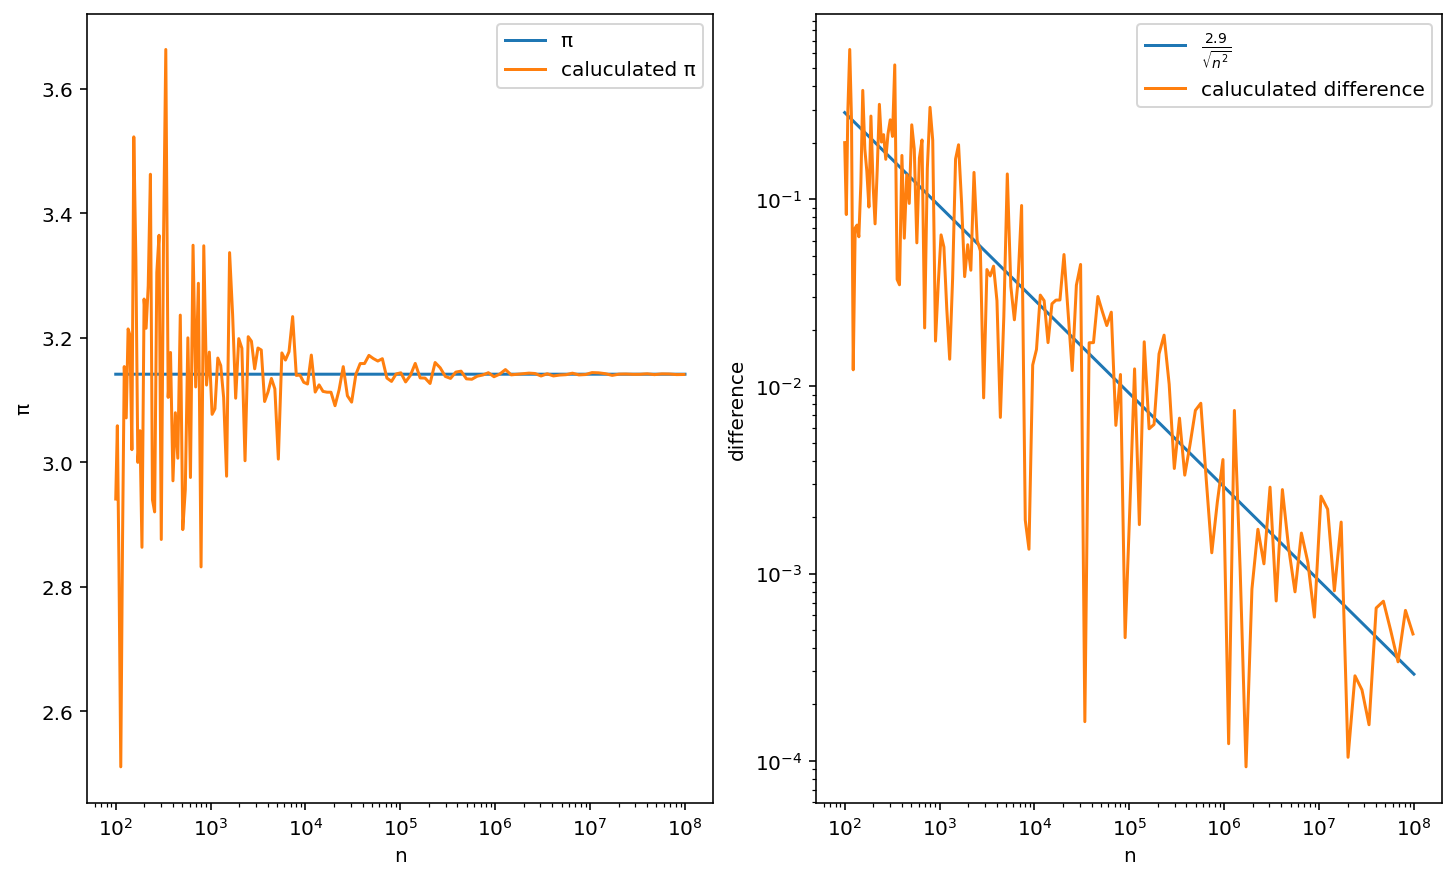

In [42]:
import numpy as np
import csv
import datetime
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

dt_now=datetime.datetime.now()
csv_name_pi='pi_'+dt_now.strftime('%Y%m%d_%H%M%S') + '.csv'

with open(csv_name_pi,'a') as f:
    w=csv.writer(f)
    w.writerow(['n','pi','diff'])
    
d=2
l=1
n=100
runcount=10**8

while (n<runcount):
    sum=0
    for j in range(n):
        ys=np.random.uniform(0, d/2)
        theta=np.random.uniform(0, math.pi/2)
        threshold=(l/2)*math.cos(theta)
        if ys<=threshold:
            sum+=1
    pi=(n)/sum
    diff=abs(pi-math.pi)
    with open(csv_name_pi,'a') as f:
        w=csv.writer(f)
        w.writerow([n,pi,diff])
    n=int(n**1.01)
fig, axs=plt.subplots(1, 2, figsize=(10,6), constrained_layout=True)

input_csv=pd.read_csv(csv_name_pi)
x=input_csv[input_csv.keys()[0]]
y0=input_csv[input_csv.keys()[1]]
y1=input_csv[input_csv.keys()[2]]

X=np.arange(100,runcount,10)
Y0=X*0+math.pi
Y1=2.9*(X**(-1/2))

axs[0].plot(X,Y0,label='π')
axs[0].plot(x,y0,label='caluculated π')
axs[0].set_xscale("log")
axs[0].set_ylabel('π')
axs[0].set_xlabel('n')
axs[0].legend()
axs[1].plot(X,Y1,label=r'$\frac{2.9}{\sqrt{n^2}}}$')
axs[1].plot(x,y1,label='caluculated difference')
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_ylabel('difference')
axs[1].set_xlabel('n')
axs[1].legend()

plt.show()